**Εισαγωγή Δεδομένων**


In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

raw_netflix_data = pd.read_csv("netflix_titles.csv")
#netflix_data = raw_netflix_data.dropna()
netflix_data = raw_netflix_data
netflix_data.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


**Ερώτημα 1**

There are more movies than TV shows (5377 movies, 2410 TV Shows)


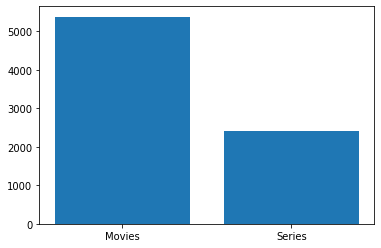

In [136]:
def print_most_popular_type(df):
  most_popular_type = df.type.value_counts()
  movie_amount  = most_popular_type.get('Movie')
  shows_amount = most_popular_type.get('TV Show')
  if movie_amount > shows_amount:
    print("There are more movies than TV shows (" + str(movie_amount) + " movies, " + str(shows_amount) + " TV Shows)")
  else:
    print("There are more TV Shows than movies (" + str(movie_amount) + " movies, " + str(shows_amount) + " TV Shows)")
  plt.bar(['Movies', 'Series'], [movie_amount, shows_amount])

print_most_popular_type(netflix_data)

**Ερώτημα 2**

There are more movies than TV shows (88 movies, 29 TV Shows)


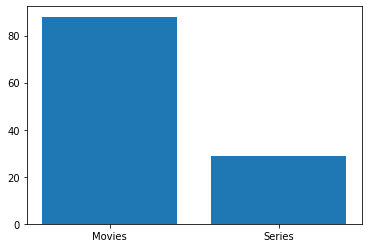

In [137]:
def recentNetflixData(df, year):
  df2 = df[df['date_added'].notnull()]
  return df2[df2['date_added'].str.split(', ', expand=True)[1].astype(int) > year].reset_index()

print_most_popular_type(recentNetflixData(netflix_data, 2020))

**Ερώτημα 3**

Most popular country is United States with 3296 titles.
[3296, 990, 722, 412, 349, 3294]


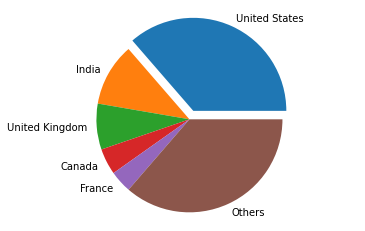

In [138]:
def seperateCommas(expression):
  return expression.split(', ')

def print_most_popular_country(df):
  countries = df.country.dropna().values
  titles_by_country = {}

  for c in countries:
    for item in seperateCommas(c):
      if item not in titles_by_country.keys():
        titles_by_country[item] = 1
      else:
        titles_by_country[item] = titles_by_country[item] + 1

  most_popular_country = max(titles_by_country, key=titles_by_country.get)
  print("Most popular country is " + str(most_popular_country) + " with " + str(titles_by_country[most_popular_country]) + " titles.")

  countries_list = []
  titles_list = []

  for x, y in titles_by_country.items():
      countries_list.append(x)
      titles_list.append(y)
  zipped = list(zip(countries_list, titles_list))
  zipped = sorted(zipped,key=lambda val: -val[1])
  
  countries_list, titles_list = list(zip(*zipped))
  countries_list = list(countries_list)
  titles_list = list(titles_list)

  countries_pie = countries_list[:5].copy()
  titles_pie = titles_list[:5].copy()
  explode = (0.1,0,0,0,0,0)

  countries_pie.append('Others')
  titles_pie.append(sum(titles_list[5:]))
  
  print(titles_pie)
  plt.pie(titles_pie, labels=countries_pie,explode=explode)
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.show()
  
print_most_popular_country(netflix_data)

**Ερώτημα 4**

In [139]:
def titles_in_category(df, category):
  filtered_data = df[df['listed_in'].notnull()]
  return filtered_data.loc[filtered_data['listed_in'].str.contains(category)]

def titles_in_country(df, country):
  filtered_data = df[df['country'].notnull()]
  return filtered_data.loc[filtered_data['country'].str.contains(country)]

def unique_items(df):
  raw_items = df.dropna().values
  items = []

  for c in raw_items:
    for item in seperateCommas(c):
      if item not in items:
        items.append(item)
  return items

def all_categories(df):
  return unique_items(df.listed_in)


countries = unique_items(netflix_data.country)
for country in countries:
  print(country)
  print(all_categories(titles_in_country(netflix_data, country)))

Brazil
['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy', 'Documentaries', 'International Movies', 'Reality TV', 'Dramas', 'Thrillers', 'Stand-Up Comedy', 'Docuseries', 'Comedies', 'LGBTQ Movies', 'Independent Movies', 'Crime TV Shows', 'TV Comedies', 'Children & Family Movies', "Kids' TV", 'Romantic TV Shows', 'Music & Musicals', 'Sports Movies', 'TV Mysteries', 'Faith & Spirituality', 'Romantic Movies', 'Stand-Up Comedy & Talk Shows', 'Science & Nature TV', 'Action & Adventure', 'TV Horror']
Mexico
['Dramas', 'International Movies', 'Crime TV Shows', 'Docuseries', 'International TV Shows', 'Documentaries', 'Comedies', 'Stand-Up Comedy', 'Romantic Movies', 'Independent Movies', 'Sports Movies', 'Romantic TV Shows', 'Spanish-Language TV Shows', 'Movies', 'TV Comedies', 'Music & Musicals', 'TV Dramas', 'Children & Family Movies', 'Horror Movies', 'TV Action & Adventure', 'Classic & Cult TV', "Kids' TV", 'Action & Adventure', 'Sci-Fi & Fantasy', 'Classic Movies', 'LGBTQ Movie

**Ερώτημα 5**

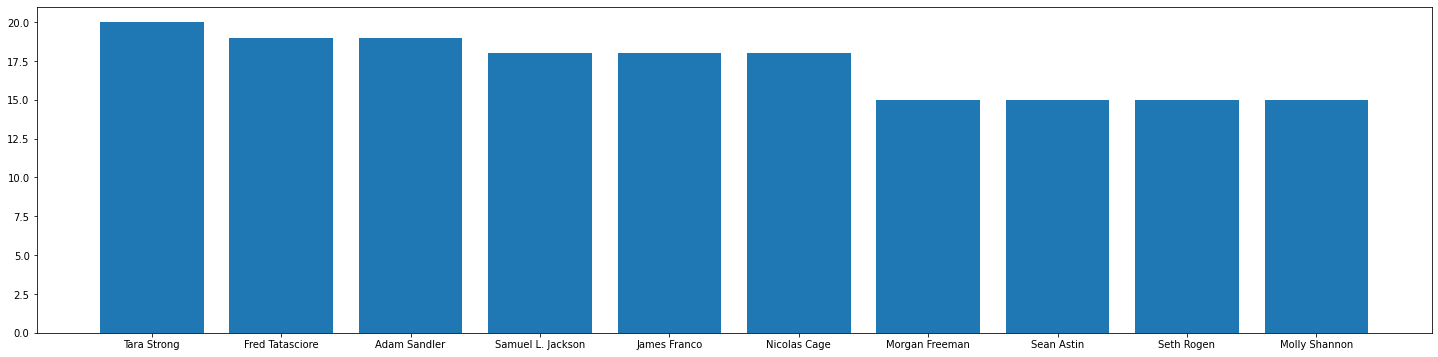

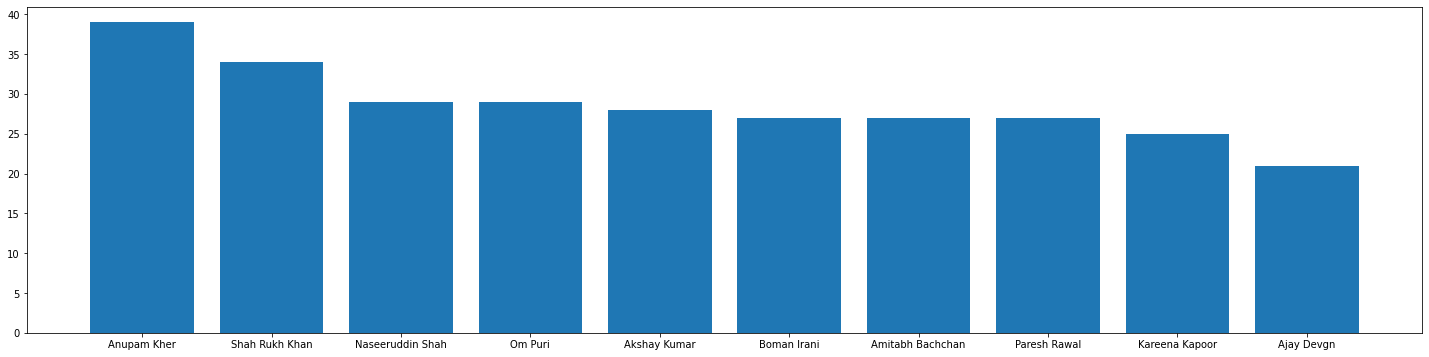

In [186]:
def most_popular_actors(df, n):
  actors = {}

  casts = df['cast']
  casts = casts.dropna()
  for c in casts:
    for actor in seperateCommas(c):
      if actor not in actors.keys():
        actors[actor] = 1
      else:
        actors[actor] +=1 
  actors = sorted(actors.items(), key=lambda x: -x[1])
  return actors[:n]

def plot_most_popular_actors(df,n):
  actors_tuple = most_popular_actors(df,n)
  if(len(actors_tuple)==0):
    print('No actors found')
    return
  actors, listings = map(list, zip(*actors_tuple))
  figure(figsize=(25, 6))
  plt.bar(actors, listings)

def plot_most_popular_actors_per_coutry(df, country, n):
  plot_most_popular_actors(titles_in_country(df, country), n)  


plot_most_popular_actors_per_coutry(netflix_data, 'United States', 10)
plot_most_popular_actors_per_coutry(netflix_data, 'India', 10)

**Ερώτημα 6**

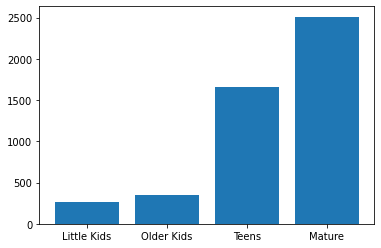

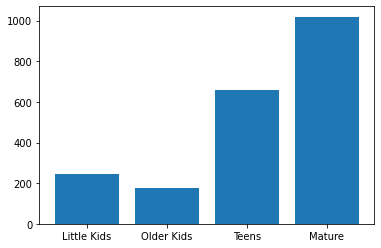

In [141]:
import matplotlib.pyplot as plt

def plot_age_groups(df):
  little_kids = df[(df['rating']=='G') |
                            (df['rating']=='TV-Y') | 
                            (df['rating']=='TV-G')]

  older_kids = df[(df['rating']=='PG') |
                            (df['rating']=='TV-Y7') |
                            (df['rating']=='TV-Y7-FV') |
                            (df['rating']=='TV-Y7-PG')]

  teens = df[(df['rating']=='PG-13') |
                            (df['rating']=='TV-14')]

  mature = df[(df['rating']=='R') |
                        (df['rating']=='NC-17') | 
                        (df['rating']=='TV-MA')]

  labels = ['Little Kids', 'Older Kids', 'Teens', 'Mature']
  values = [little_kids.shape[0] - 1, older_kids.shape[0] - 1, teens.shape[0] - 1, mature.shape[0] - 1]


  plt.bar(labels,values)
  plt.show()

plot_age_groups(netflix_data[netflix_data['type'] == 'Movie'])
plot_age_groups(netflix_data[netflix_data['type'] == 'TV Show'])

**Ερώτημα 7**

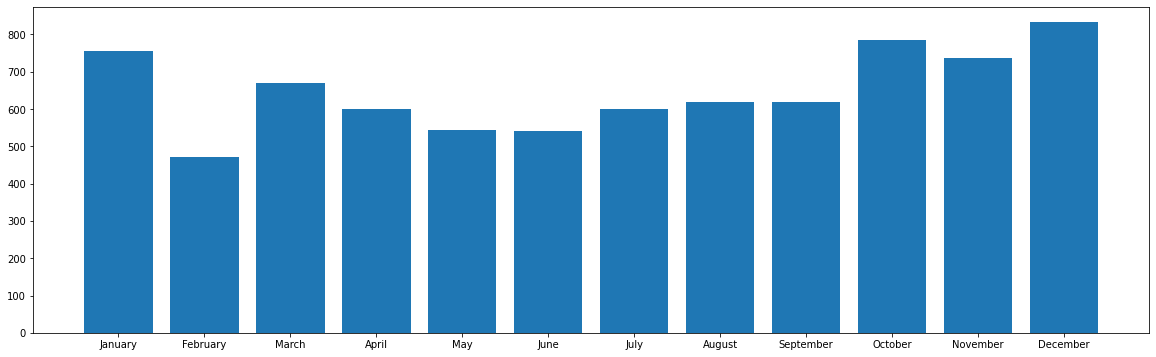

In [142]:
def plot_month_popularity(df):
  test = df.groupby(df['date_added'].str.split().str[0])
  a = test['date_added'].count()
  months = ['January','February','March','April','May','June','July','August','September','October','November','December']
  month_count = []
  for month in months:
    month_count.append(a.get(month))
  figure(figsize=(20, 6))
  plt.bar(months, month_count)
  plt.show()

plot_month_popularity(netflix_data)

**Ερώτημα 8**

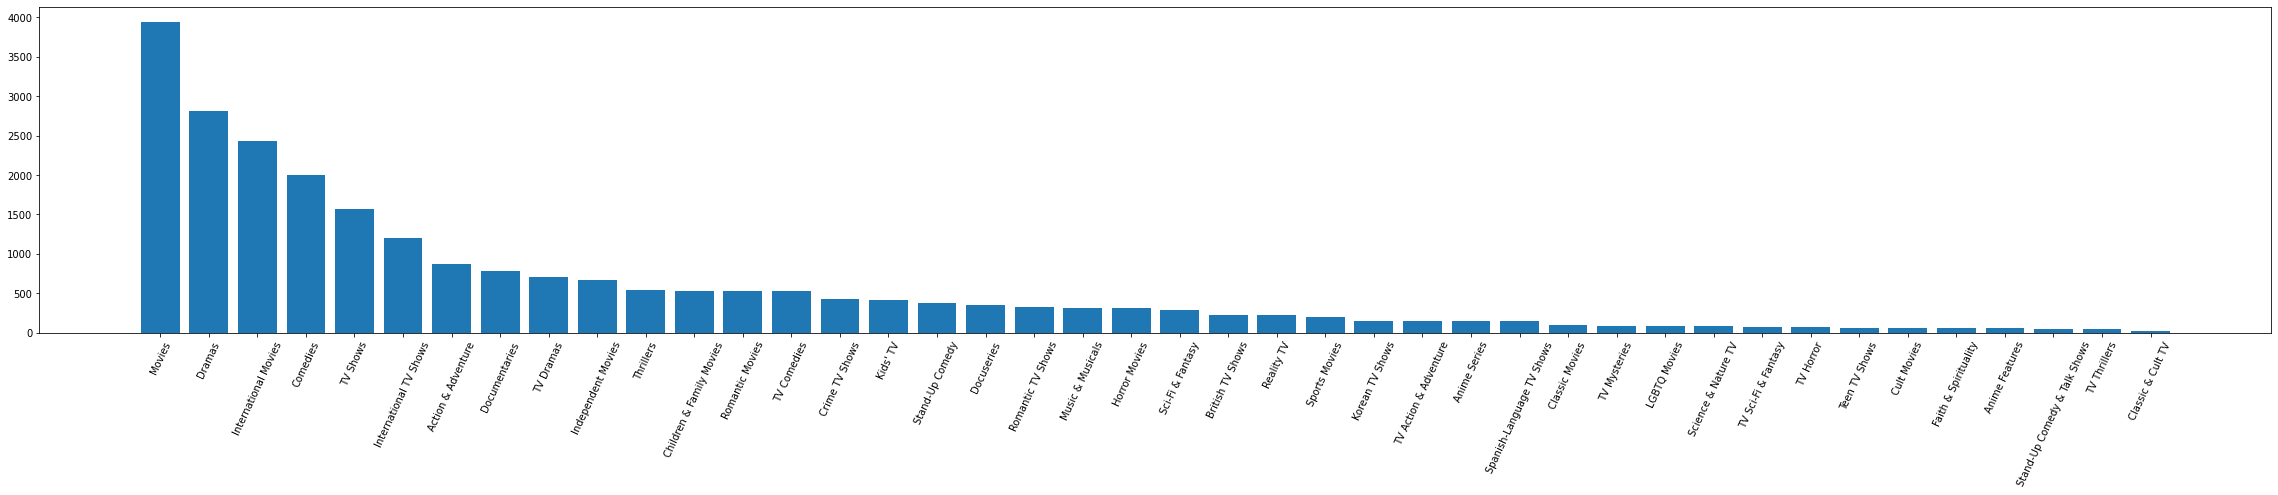

In [143]:
def plot_categories(df):
  categories = all_categories(df)
  categories_count = []
  for category in categories:
    categories_count.append(titles_in_category(df, category).shape[0] - 1)

  zipped = list(zip(categories, categories_count))
  zipped = sorted(zipped,key=lambda val: -val[1])
  categories,categories_count = list(zip(*zipped))
  
  figure(figsize=(40, 6))
  plt.bar(categories, categories_count)
  plt.xticks(rotation=65)
  plt.show()

plot_categories(netflix_data)

**Ερώτημα 9**

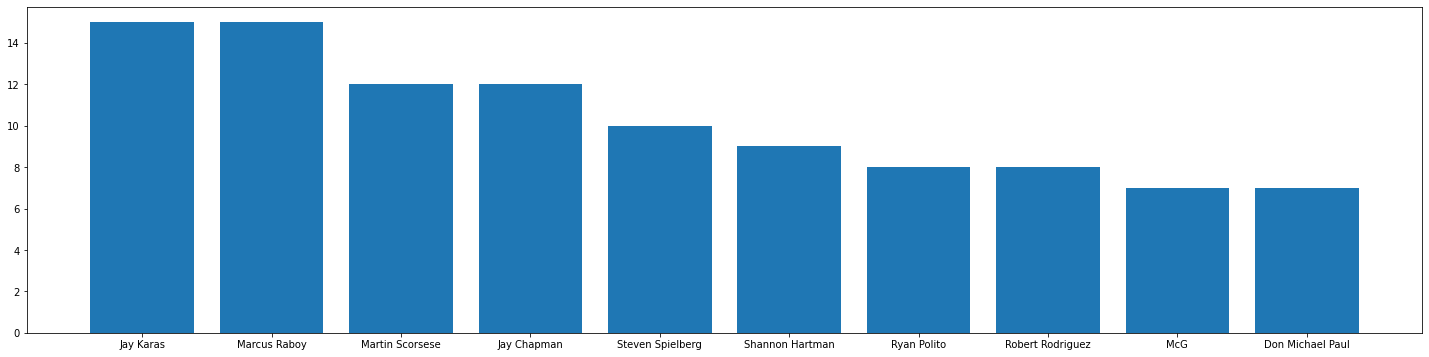

In [207]:
def most_popular_directors(df, n):
  directors_dict = {}

  directors = df['director']
  directors = directors.dropna()
  for d in directors:
    for director in seperateCommas(d):
      if director not in directors_dict.keys():
        directors_dict[director] = 1
      else:
        directors_dict[director] += 1 
  directors_list = sorted(directors_dict.items(), key=lambda x: -x[1])
  return directors_list[:n]

def plot_most_popular_directors(df,n):
  directors_tuple = most_popular_directors(df,n)
  if(len(directors_tuple)==0):
    print('No directors found')
    return
  directors, listings = map(list, zip(*directors_tuple))
  figure(figsize=(25, 6))
  plt.bar(directors, listings)

def plot_most_popular_directors_per_coutry(df, country, n):
  plot_most_popular_directors(titles_in_country(df, country), n)  


plot_most_popular_directors_per_coutry(netflix_data, 'United States', 10)

test = netflix_data[netflix_data['director'].notnull()]

**Ερώτημα 10**

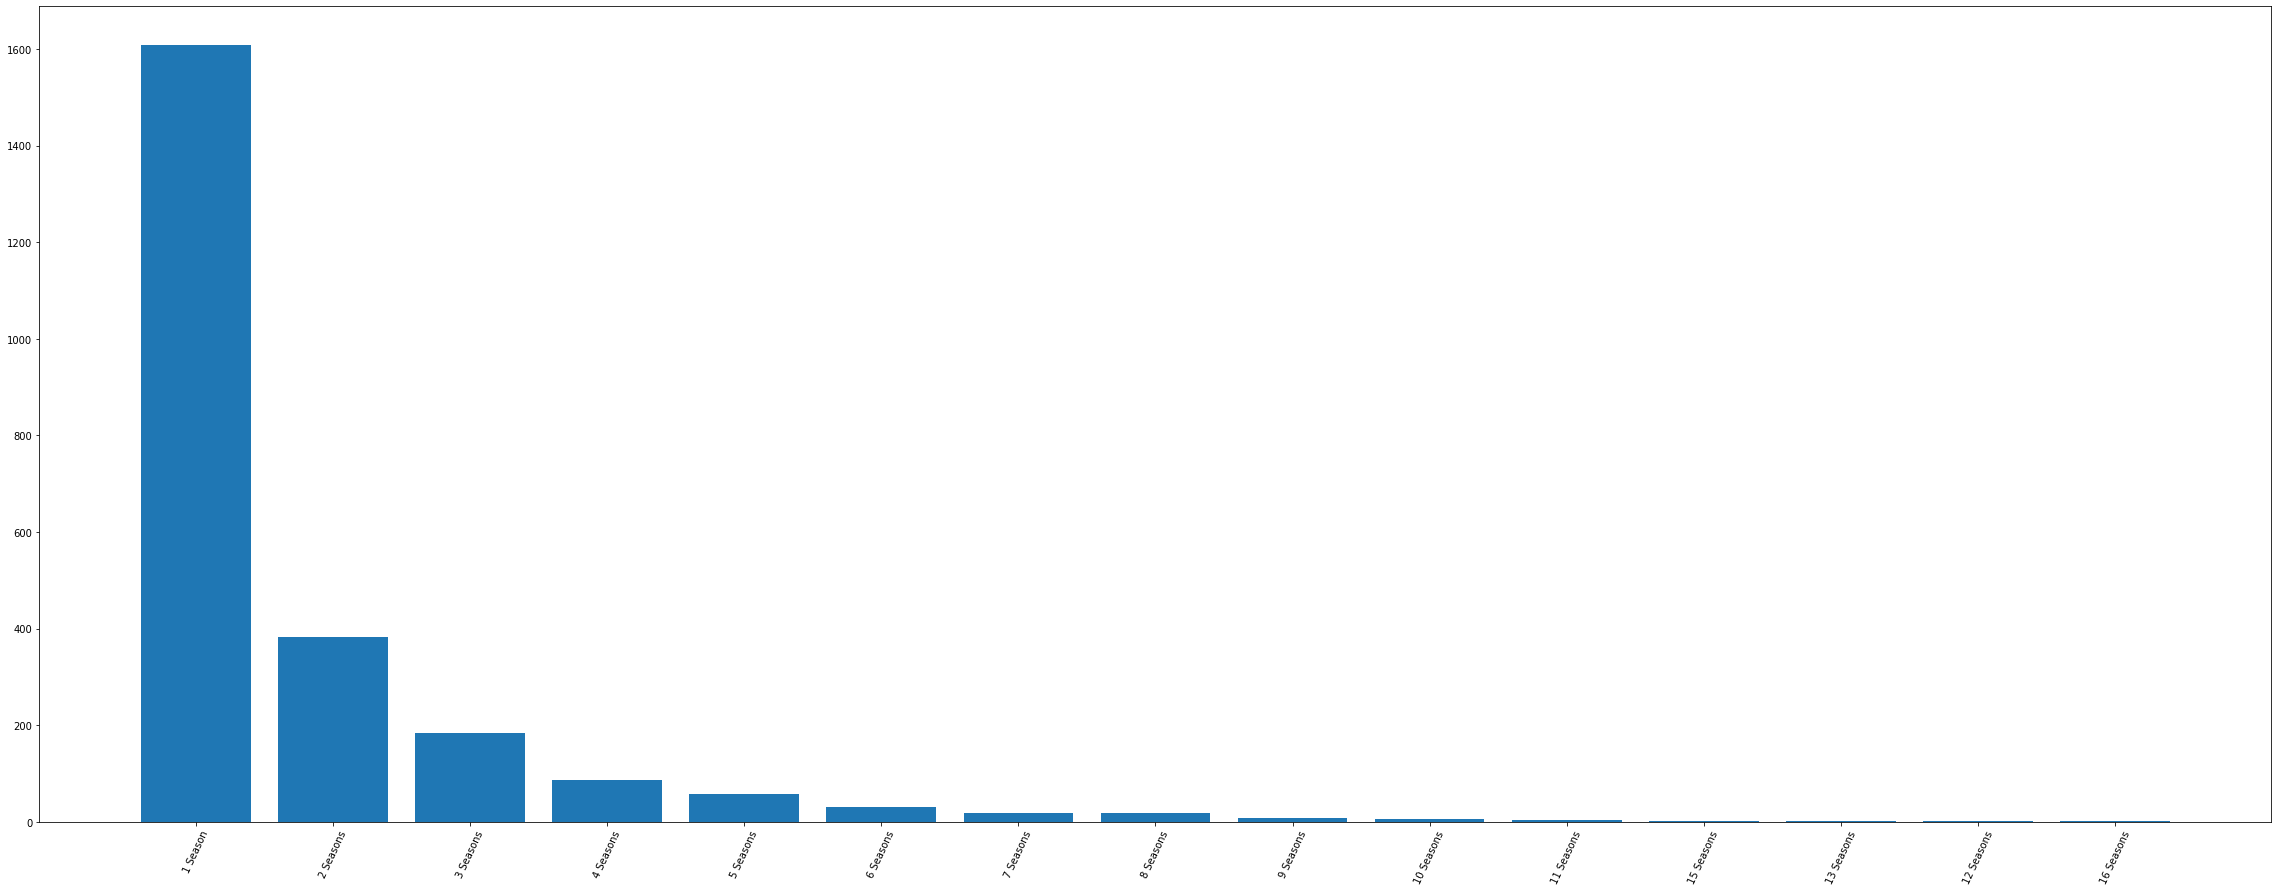

In [144]:
series = netflix_data[netflix_data['type']=='TV Show']
series = series[series['duration'].notnull()]
series = series.groupby('duration').count()
series = series['show_id']

series = series.sort_values(ascending=False)

num_of_seasons = series.index.to_list()
count = series.to_list()


figure(figsize=(40, 15))
plt.bar(num_of_seasons, count)
plt.xticks(rotation=65)
plt.show()

In [145]:
'''
num_of_seasons = series.index.to_list()
count = series.to_list()


figure(figsize=(40, 6))
plt.bar(num_of_seasons, count)
plt.xticks(rotation=65)
plt.show()
'''

'\nnum_of_seasons = series.index.to_list()\ncount = series.to_list()\n\n\nfigure(figsize=(40, 6))\nplt.bar(num_of_seasons, count)\nplt.xticks(rotation=65)\nplt.show()\n'